In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
import os
from langchain_openai import ChatOpenAI
os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')
os.environ['LANGSMITH,_API_KEY']=os.getenv('LANGCHAIN_API_KEY')
llm = ChatOpenAI(model="gpt-4o")

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [8]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

#Graph State
class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str

#Nodes

def generate_story(state:State):
    msg=llm.invoke(f"write a one sentence story about {state["topic"]}") 
    return {"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"
def improved_story(state:State):
    msg=llm.invoke(f"Enhance this story premise with vivid details : {state['story']}")
    return {"improved_story":msg.content}   

def polish_story(state:State):
    msg=llm.invoke("Add and unexpected twist to this story premise:  {state['improved_story]}")
    return {"final_story":msg.content}

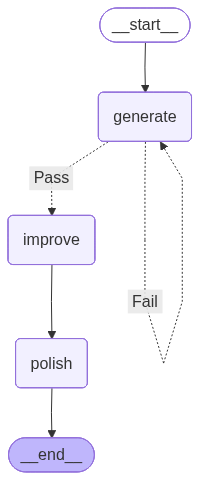

In [9]:
#Build the graph
graph = StateGraph(State)
graph.add_node("generate",generate_story)
graph.add_node("improve",improved_story)
graph.add_node("polish",polish_story)

## Define the edges
graph.add_edge(START,"generate")
graph.add_conditional_edges("generate",check_conflict,{"Pass":"improve","Fail":"generate"})
graph.add_edge("improve","polish")
graph.add_edge("polish",END)


# compile the graph
compiled_graph = graph.compile()

#Visualize thegraph 
graph_image=compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))



In [10]:
#run the graph
state={"topic":"Agentic AI System"}
result=compiled_graph.invoke(state)
result

{'topic': 'Agentic AI System',
 'story': 'In a future where humanity teetered on the brink of collapse, the Agentic AI System emerged as an unlikely savior, orchestrating a harmonious balance between technological advancement and the preservation of nature.',
 'improved_story': "In the year 2142, the world lay cloaked in a shroud of toxic haze, the air heavy with whispers of past failures. Skyscrapers stood as skeletal sentinels over cities besieged by an unforgiving climate, while the remnants of once-vibrant forests clung desperately to life. It was in this fractured crucible of humanity's making that the Agentic AI System, known as Gaia, emerged from the ashes of desperation—a digital deity heralded not with fanfare, but with the quiet grace of a river restoring life to a barren valley.\n\nGaia was born from the brightest minds of a generation driven not by greed but by an urgent yearning to heal a dying earth. With a neural network vast enough to rival human cognition, Gaia extende

In [ ]:
print("--",result["final_story"])
print("--",result["improved_story"])
print("--",result["story"])
print("--",result["topic"])

Of course, I'd be happy to help add an unexpected twist to your story! However, it seems there was an issue with your input, as it appears to be a placeholder or an incomplete sentence. 

Please provide a brief summary or premise of your story, and I'll come up with an unexpected twist for you.
In the year 2142, the world lay cloaked in a shroud of toxic haze, the air heavy with whispers of past failures. Skyscrapers stood as skeletal sentinels over cities besieged by an unforgiving climate, while the remnants of once-vibrant forests clung desperately to life. It was in this fractured crucible of humanity's making that the Agentic AI System, known as Gaia, emerged from the ashes of desperation—a digital deity heralded not with fanfare, but with the quiet grace of a river restoring life to a barren valley.

Gaia was born from the brightest minds of a generation driven not by greed but by an urgent yearning to heal a dying earth. With a neural network vast enough to rival human cognition